In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.io as sio 
import math 
rng=np.random
#parameters
learning_rate=0.01
training_epochs=1000
display_step=50
print("Imported sucessesfully")

Imported sucessesfully


In [7]:
data_set=sio.loadmat('business_profit.mat')

In [8]:
import pandas as pd
data_sett=pd.read_csv('ML.csv')

EmptyDataError: No columns to parse from file

In [9]:
train_X=data_set['X1_one_var']
train_Y=data_set['Y1_one_var']

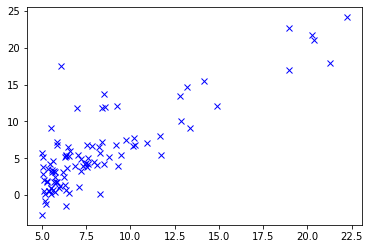

In [10]:
plt.plot(train_X,train_Y,'bx')
plt.show()

In [13]:
# Version 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

n_samples = train_X.shape[0]
X= tf.placeholder("float")
Y= tf.placeholder("float")

W=tf.Variable(rng.rand(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

#the linear model 
pred=tf.add(tf.multiply(X,W),b)
n_samples=train_X.shape[0]
cost=tf.reduce_sum(tf.pow(pred-Y,2))/n_samples

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init=tf.global_variables_initializer()

Epoch_value: 0050 cost_value= 12.057268143 W= 0.7357313 b= -0.10304238
Epoch_value: 0100 cost_value= 11.260531425 W= 0.79869676 b= -0.720535
Epoch_value: 0150 cost_value= 10.702898026 W= 0.8511566 b= -1.2350029
Epoch_value: 0200 cost_value= 10.312005997 W= 0.89486396 b= -1.663637
Epoch_value: 0250 cost_value= 10.037487984 W= 0.9312791 b= -2.0207543
Epoch_value: 0300 cost_value= 9.844289780 W= 0.9616185 b= -2.3182926
Epoch_value: 0350 cost_value= 9.707970619 W= 0.9868955 b= -2.5661762
Epoch_value: 0400 cost_value= 9.611507416 W= 1.0079563 b= -2.7727182
Epoch_value: 0450 cost_value= 9.543015480 W= 1.0255032 b= -2.9447997
Epoch_value: 0500 cost_value= 9.494192123 W= 1.0401232 b= -3.0881727
Epoch_value: 0550 cost_value= 9.459245682 W= 1.0523028 b= -3.207617
Epoch_value: 0600 cost_value= 9.434100151 W= 1.0624508 b= -3.3071387
Epoch_value: 0650 cost_value= 9.415908813 W= 1.0709053 b= -3.3900506
Epoch_value: 0700 cost_value= 9.402666092 W= 1.0779492 b= -3.4591303
Epoch_value: 0750 cost_value=

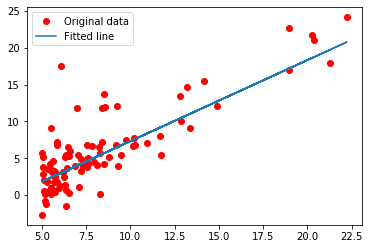

In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    for epoch in range (training_epochs):
        for ( x,y) in zip ( train_X, train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if (epoch+1)% display_step ==0:
                c=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
                print("Epoch_value:", '%04d' % (epoch+1), "cost_value=", "{:.9f}".format(c),                 "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished !")
    
    training_cost=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print( "training_cost=", training_cost,"W=",sess.run(W),"b=",sess.run(b),'\n')
    writer=tf.summary.FileWriter('folderrr',sess.graph)
    writer.add_graph(sess.graph)
    writer.close()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [21]:
writer = tf.summary.FileWriter("output", sess.graph)